In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
pd.options.display.max_columns = 50
import warnings
warnings.filterwarnings('ignore')


housing = pd.read_csv('./data/Ames_Housing_Price_Data.csv', index_col=0)
housing.shape

(2580, 81)

In [47]:
housing.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,...,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,...,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,...,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,...,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,...,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,...,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [48]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [49]:
#create dependant variable for tests against other variables (e.g. f_regression, scatter plot, etc.)
Y = housing['SalePrice']

In [50]:
#create eugene's subset
housing_eug = housing[['Exterior1st','Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',\
                       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',\
                       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',\
                       'Heating', 'HeatingQC', 'CentralAir','MoSold', 'YrSold','SaleCondition']]
housing_eug

,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,MoSold,YrSold,SaleCondition
1,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,3,2010,Normal
2,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,2,2009,Normal
3,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,11,2007,Normal
4,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,5,2009,Normal
5,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,11,2009,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,Grav,Fa,N,5,2009,Normal
760,BrkFace,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,6,2009,Normal
761,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,284.0,Unf,0.0,717.0,1001.0,GasA,TA,N,8,2007,Normal
762,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,No,GLQ,841.0,Unf,0.0,144.0,985.0,GasA,Ex,Y,7,2007,Normal


In [51]:
#separate numerical and categorical variables for plotting
housing_eug.dtypes
num_features = housing_eug.select_dtypes(include=['int64','float64']).columns
cat_features = housing_eug.select_dtypes(include=['object']).columns

array([[<AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>],
       [<AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'MoSold'}>],
       [<AxesSubplot:title={'center':'YrSold'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

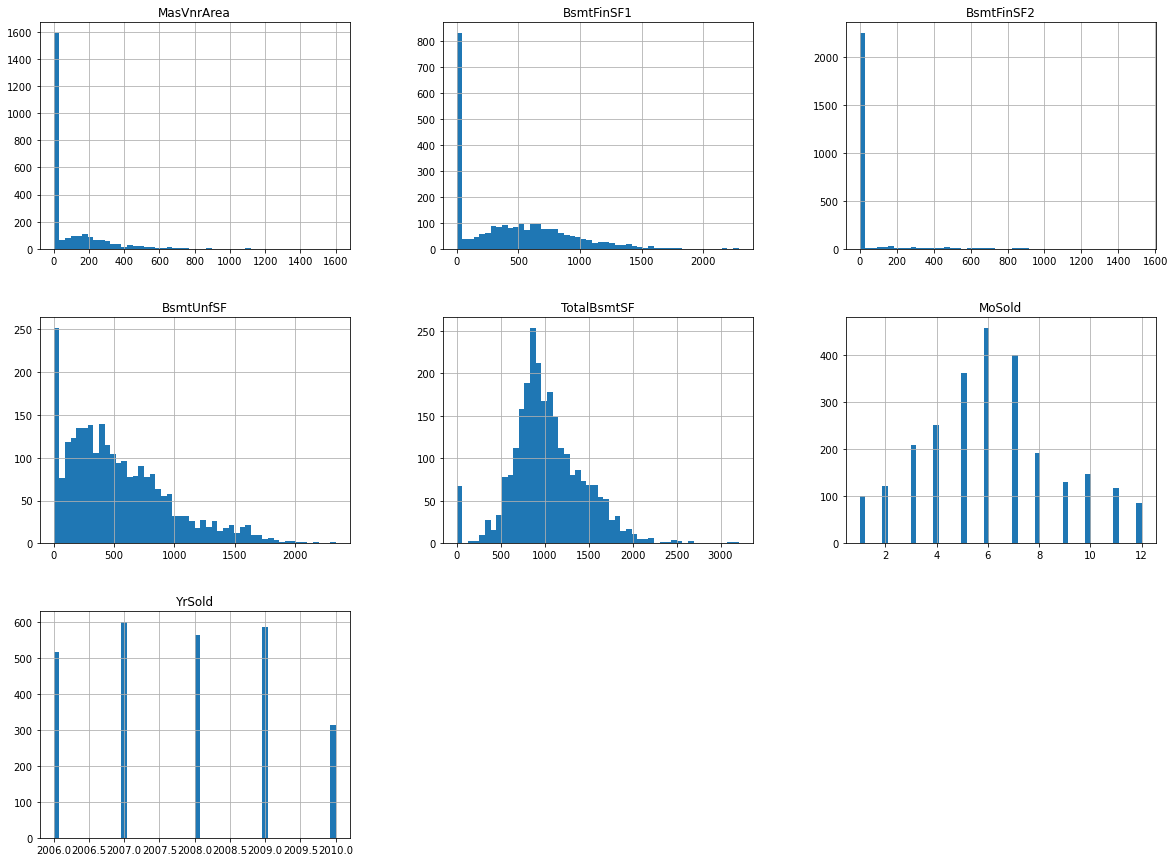

In [52]:
#histograms for all variables
housing_eug.hist(bins=50, figsize=(20,15))

BsmtFinSF1       1
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
MasVnrType      14
MasVnrArea      14
BsmtQual        69
BsmtCond        69
BsmtFinType1    69
BsmtFinType2    70
BsmtExposure    71
dtype: int64

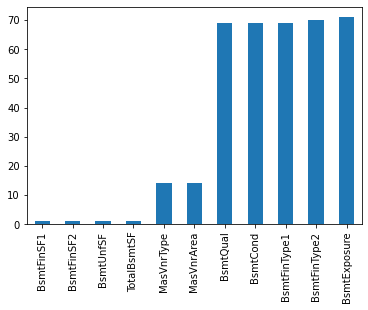

In [53]:
#first check of which variables have missing data
missing = housing_eug.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
missing

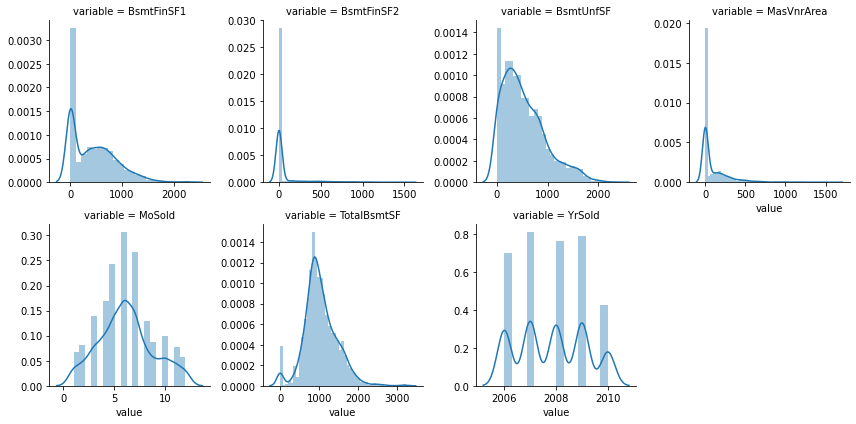

In [54]:
# Grid of distribution plots of all numerical features
f = pd.melt(housing_eug, value_vars=sorted(num_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

#log transfrom most of these b/c the have right skews?

In [55]:
# #transform month and year sold to categorical
# housing_eug['MoSold'] = housing_eug.MoSold.apply(lambda x: str(x))
# housing_eug['YrSold'] = housing_eug.YrSold.apply(lambda x: str(x))

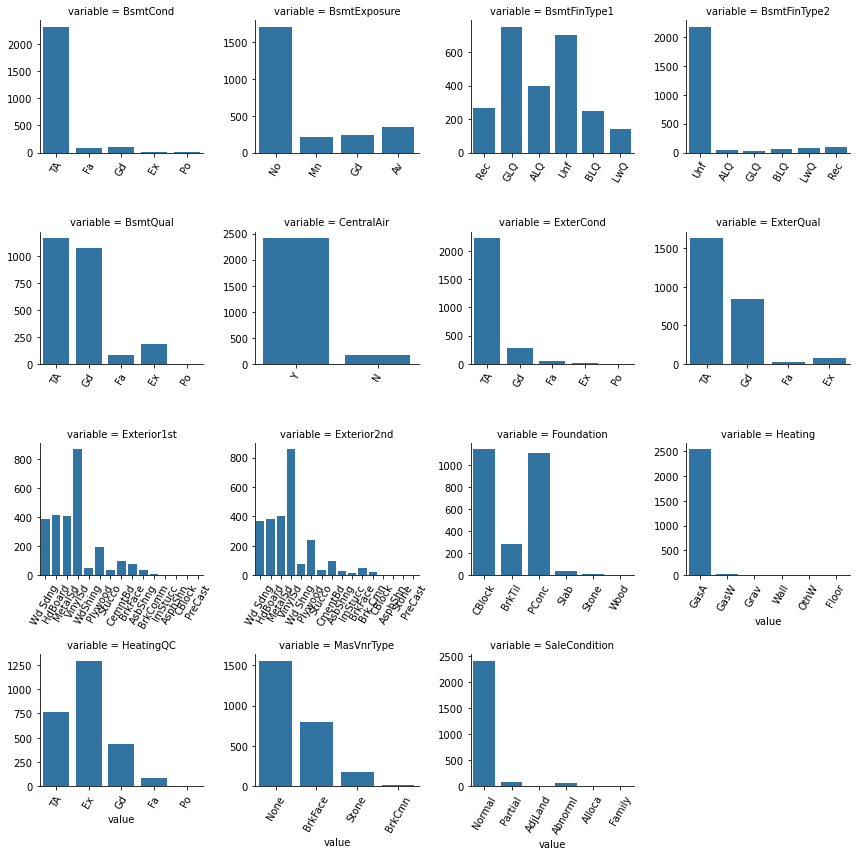

In [56]:
# Count plots of categorical features
f = pd.melt(housing_eug, value_vars=sorted(cat_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

### Convert Ordinals

In [57]:
#convert ordinal categorical variables

# Basement Condition
housing_eug.BsmtCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Exposure
housing_eug.BsmtExposure.replace({'No':1, 'Mn':2, 'Av':3, 'Gd':4}, inplace=True)

# Finished Basement 1 Rating
housing_eug.BsmtFinType1.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Finished Basement 2 Rating
housing_eug.BsmtFinType2.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Basement Quality
housing_eug.BsmtQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Exterior Quality
housing_eug.ExterQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Exterior Condition
housing_eug.ExterCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Heating Quality and Condition
housing_eug.HeatingQC.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

#convert NAs to 0
housing_eug[['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual','ExterQual','ExterCond','HeatingQC']] = \
housing_eug[['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual','ExterQual','ExterCond','HeatingQC']].fillna(0)

BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
MasVnrType     14
MasVnrArea     14
dtype: int64

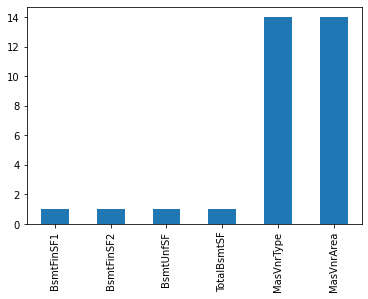

In [58]:
#recheck of variables that have missing data
missing = housing_eug.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
missing

In [59]:
#handle the remaining missing values
housing_eug[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','MasVnrType','MasVnrArea']] = \
housing_eug[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','MasVnrType','MasVnrArea']].fillna(0)

In [60]:
#last check of variables that have missing data
#no more missing
missing = housing_eug.isnull().sum()
missing = missing[missing > 0]
missing

Series([], dtype: int64)

### Convert Binary categorical

In [61]:
#convert CentralAir - binary categorical
housing_eug['CentralAir'] = housing_eug.CentralAir.map(lambda t:0 if t=='N' else 1)

## Dummification starts here

In [62]:
#drop Exterior2nd - doesn't seem to add much value and not worth the additional dummy columns
#refer to earlier plots
housing_eug.drop(columns='Exterior2nd', inplace=True)

In [63]:
dummies=['Exterior1st','MasVnrType','Foundation','Heating','SaleCondition']

for d in dummies:
    temp = pd.get_dummies(housing_eug[d], prefix=d, prefix_sep='__')
    temp = temp.drop(d+'__'+str(housing_eug[d].mode()[0]), axis=1)
    #drop the most common one (mode), making it the base case
    housing_eug = pd.concat([housing_eug.drop(d, axis=1),temp], axis=1)
    #merge back with main df

In [64]:
housing_eug

,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,MoSold,YrSold,Exterior1st__AsbShng,Exterior1st__AsphShn,Exterior1st__BrkComm,Exterior1st__BrkFace,Exterior1st__CBlock,Exterior1st__CemntBd,Exterior1st__HdBoard,Exterior1st__ImStucc,Exterior1st__MetalSd,Exterior1st__Plywood,Exterior1st__PreCast,Exterior1st__Stucco,Exterior1st__Wd Sdng,Exterior1st__WdShing,MasVnrType__0,MasVnrType__BrkCmn,MasVnrType__BrkFace,MasVnrType__Stone,Foundation__BrkTil,Foundation__PConc,Foundation__Slab,Foundation__Stone,Foundation__Wood,Heating__Floor,Heating__GasW,Heating__Grav,Heating__OthW,Heating__Wall,SaleCondition__Abnorml,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Partial
1,0.0,3,3,3.0,3.0,1.0,3.0,238.0,1.0,0.0,618.0,856.0,3,1,3,2010,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,149.0,4,3,4.0,3.0,2.0,6.0,552.0,5.0,393.0,104.0,1049.0,3,1,2,2009,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,4,3,3.0,3.0,1.0,5.0,737.0,1.0,0.0,100.0,837.0,5,1,11,2007,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,4,4,2.0,3.0,1.0,1.0,0.0,1.0,0.0,405.0,405.0,4,1,5,2009,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0.0,4,3,4.0,3.0,1.0,6.0,643.0,1.0,0.0,167.0,810.0,5,1,11,2009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,0.0,3,3,3.0,3.0,1.0,1.0,0.0,1.0,0.0,952.0,952.0,2,0,5,2009,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
760,0.0,3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1,6,2009,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
761,0.0,3,3,3.0,3.0,1.0,4.0,284.0,1.0,0.0,717.0,1001.0,3,0,8,2007,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
762,144.0,4,3,4.0,3.0,1.0,6.0,841.0,1.0,0.0,144.0,985.0,5,1,7,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### Performing Unary Feature Selection

We can use the classical F-test to see which features are most important (using their p-value). This inspects the strength of the Pearson correlation of the features with the `SalePrice`.

In [65]:
from sklearn.feature_selection import f_regression
F_values, p_values = f_regression(housing_eug, Y)

pd.Series(p_values, index=housing_eug.columns).sort_values()

ExterQual                  0.000000e+00
TotalBsmtSF               7.306053e-313
BsmtQual                  1.672712e-239
Foundation__PConc         3.863534e-169
MasVnrArea                4.164095e-162
BsmtFinSF1                5.469112e-136
HeatingQC                 4.145771e-120
BsmtExposure              9.212521e-105
BsmtFinType1               1.775834e-76
MasVnrType__BrkFace        1.116595e-45
SaleCondition__Partial     1.008459e-40
CentralAir                 2.009279e-40
MasVnrType__Stone          4.477075e-39
Foundation__BrkTil         6.905810e-30
BsmtCond                   1.864986e-26
Exterior1st__Wd Sdng       4.723047e-18
BsmtUnfSF                  8.441921e-18
Exterior1st__MetalSd       1.126791e-13
Foundation__Slab           1.084768e-08
Exterior1st__AsbShng       2.484957e-08
Exterior1st__CemntBd       2.529497e-06
Exterior1st__HdBoard       2.600711e-06
SaleCondition__Abnorml     2.957281e-04
Heating__Grav              2.170240e-03
Exterior1st__WdShing       5.018325e-03


#### Transforming data that appears to be skewed

In [75]:
#LotArea
print("original skew: " + str(housing_eug['TotalBsmtSF'].skew()))
loglot=np.log(housing_eug['TotalBsmtSF']+1)
print("after log transformation: " + str(loglot.skew()))

original skew: 0.5104140094451572
after log transformation: -5.00440064730379


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='Count'>

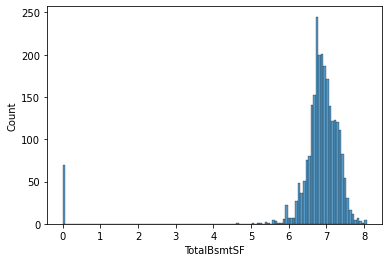

In [76]:
sns.histplot(np.log(housing_eug['TotalBsmtSF']+1))

## Below are code snippets from the project overview notebook -- IGNORE

In [10]:
price        = housing['SalePrice']
size_related = housing.filter(regex='SF$|Area$')
size_related.head()

,GrLivArea,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea
1,856,7890,0.0,618.0,856.0,856,0,0,399.0,0,0,0
2,1049,4235,149.0,104.0,1049.0,1049,0,0,266.0,0,105,0
3,1001,6060,0.0,100.0,837.0,1001,0,0,216.0,154,0,0
4,1039,8146,0.0,405.0,405.0,717,322,0,281.0,0,0,0
5,1665,8400,0.0,167.0,810.0,810,855,0,528.0,0,45,0


Check missingness in the columns:

In [92]:
housing_eug.isnull().sum(axis=0)

MasVnrArea                0
ExterQual                 0
ExterCond                 0
BsmtQual                  0
BsmtCond                  0
BsmtExposure              0
BsmtFinType1              0
BsmtFinSF1                0
BsmtFinType2              0
BsmtFinSF2                0
BsmtUnfSF                 0
TotalBsmtSF               0
HeatingQC                 0
CentralAir                0
MoSold                    0
YrSold                    0
Exterior1st__AsbShng      0
Exterior1st__AsphShn      0
Exterior1st__BrkComm      0
Exterior1st__BrkFace      0
Exterior1st__CBlock       0
Exterior1st__CemntBd      0
Exterior1st__HdBoard      0
Exterior1st__ImStucc      0
Exterior1st__MetalSd      0
Exterior1st__Plywood      0
Exterior1st__PreCast      0
Exterior1st__Stucco       0
Exterior1st__Wd Sdng      0
Exterior1st__WdShing      0
MasVnrType__0             0
MasVnrType__BrkCmn        0
MasVnrType__BrkFace       0
MasVnrType__Stone         0
Foundation__BrkTil        0
Foundation__PConc   

<AxesSubplot:>

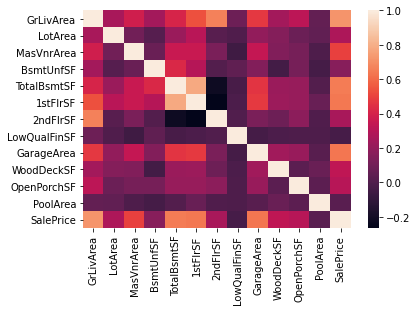

In [13]:
import seaborn as sns
corr = pd.concat([size_related, housing['SalePrice']], axis=1).corr()
sns.heatmap(corr)

### GrLivArea 

Most of the size-related columns have significant p-values on their correlations with **`SalePrice`**. The **Gross Living Area** (`GrLivArea`) has a vanishing p-value, which indicates a very strong statistical relationship. We will focus our research on **`GrLivArea`**.

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

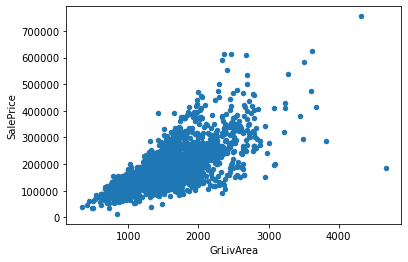

In [14]:
housing[['GrLivArea', 'SalePrice']].plot(kind='scatter', x='GrLivArea', y='SalePrice')

### A Large Variation in Price/SqrFt

The scatterplot above displays a fan-like structure which widens for larger and more expensive houses. Considering straight lines through the origin, the slopes of these lines indicate the price per square-foot.

The above plot suggests a wide range of $price/foot^2$ among the houses in Ames. If we fit a naive simple linear model, the constant variance assumption of simple linear regression would be seriously violated.

The question is: how do we model this effectively? Luckily, pandas scatterplot has **logx** and **logy** arguments, which give us an important hint.

Text(0.5, 0, 'Log(GrLivArea)')

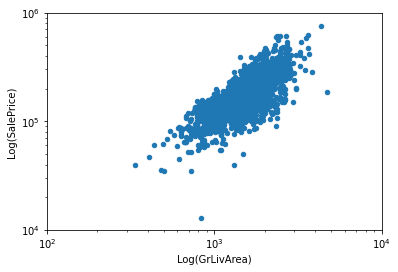

In [17]:
from matplotlib import pyplot as plt
housing[['GrLivArea', 'SalePrice']].plot(kind='scatter', x='GrLivArea', y='SalePrice', logx=True, logy=True)
plt.ylim(1e4, 1e6)
plt.xlim(1e2, 1e4)
plt.ylabel('Log(SalePrice)')
plt.xlabel('Log(GrLivArea)')

In [19]:
lm = LinearRegression()
grLivArea = size_related[['GrLivArea']]
lm.fit(grLivArea, price)
lm.score(grLivArea, price)

0.5183732056699006

In [20]:
lm.fit(np.log10(grLivArea), np.log10(price))
lm.score(np.log10(grLivArea), np.log10(price))

0.5400973491971155

In [21]:
lm.intercept_, lm.coef_

(2.442342023027404, array([0.88110363]))

In [22]:
Nbr_quantile = housing.groupby('Neighborhood')['GrLivArea'].quantile(0.8)
joint_Nbr_quantile = pd.merge(housing[['Neighborhood']], Nbr_quantile, how='left', left_on='Neighborhood', right_index=True)

In [23]:
smaller_home = grLivArea.GrLivArea < joint_Nbr_quantile.GrLivArea
lm.fit(np.log10(grLivArea)[smaller_home], np.log10(price)[smaller_home])
lm.intercept_, lm.coef_

(2.085009197724225, array([0.99983166]))

The above suggests that, for smaller homes (the bottom 80% according to `GrLivArea`), the relationship between price and area is constant (independent of area).

In [24]:
lm.fit(np.log10(grLivArea)[~smaller_home],np.log10(price)[~smaller_home])
lm.intercept_, lm.coef_

(1.4706789908596356, array([1.16147633]))

### Downloading the Lat-Long Coordinates with geopy
- `pip install geopy`
- Use `rate_limiter` to slow down the download speed.

In [25]:
import geopy
from geopy import Nominatim
from geopy.extra.rate_limiter import RateLimiter

locator = Nominatim(user_agent="myGeocoder")
location = locator.geocode("Champ de Mars, Paris, France")
location

Location(Champ de Mars, Rue Saint-Dominique, Quartier du Gros-Caillou, Paris 7e Arrondissement, Paris, Île-de-France, France métropolitaine, 75007, France, (48.85614465, 2.297820393322227, 0.0))

- Wrap the raw geocoder in a rate-limiter to prevent it from being blocked.

In [26]:
geocode = RateLimiter(locator.geocode, min_delay_seconds=1.5)

In [33]:
location = geocode('435 East 14th street, new york, NY, USA')
location = geocode('134 Allen street, new york, NY, USA')
location

Location(134, Allen Street, Lower East Side, Manhattan Community Board 3, Manhattan, New York County, New York, 10002, United States, (40.7199299, -73.9897224, 0.0))

- Given a list (or series) of street addresses (or `NaN` values) in Ames, Iowa:

`locations = [geocode(addr+', Ames, USA') if type(addr)==str else None for addr in stree_addresses]`

In [35]:
stree_addresses = ['435 East 14th street, new york, NY, USA','134 Allen street, new york, NY, USA']

In [36]:
locations = [geocode(addr) if type(addr)==str else None for addr in stree_addresses]

In [37]:
locations

[Location(435, East 14th Street, Stuy Town, Manhattan Community Board 6, Manhattan, New York County, New York, 10009, United States, (40.7310362, -73.9808238, 0.0)),
 Location(134, Allen Street, Lower East Side, Manhattan Community Board 3, Manhattan, New York County, New York, 10002, United States, (40.7199299, -73.9897224, 0.0))]

### How to Compute the Distances between Two Long-Lat Coordinates?

- There are packages (like **geopy**) which allow you to compute the spherical distances. 
- For the purpose of machine learning, it is desirable to let the $L^2$ Euclidean distance (used by the algorithm) approximate the spherical distance. This can be very handy in neighborhood comps modeling.
- Let $(\theta_1, \phi_1)$ and $(\theta_2, \phi_2)$ be two points on the sphere (the earth). When these two points are sufficiently close to each other, $\theta_1\cong \theta_2$ and $\phi_1\cong\phi_2$. For simplicity we assume that the sphere has a radius $1$ (The earth radius is about $3950$ miles). The spherical distance $\Delta s$ can be approximated by the following formula:

$$\Delta^2 s = cos^2(\phi)\Delta^2\theta + \Delta^2\phi$$

where $\phi\cong \phi_1\cong\phi_2\cong 42^{\circ}$ at **Ames**.

This suggests that if we map the long-lat coordinates $(\theta_i, \phi_i), 1\leq i\leq 2$ to $(cos(\phi)\theta_1, \phi_1)$, $(cos(\phi)\theta_2, \phi_2)$,
the 2D Euclidean distance is an approximation of the spherical distance.